# Introduction: What is Logistic Regression?
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

## Behind The Mask 

The term **logistic** in logistic regression is used because we are applying another function to the weighted sum of input data and parameters of the model and this function is called logit (**sigmoid**) function.

Sigmoid function always outputs values between 0 and 1, mapping values to a range and thus can be used to calculate probabilities of input data belonging to a certain class:


<img src = "https://miro.medium.com/max/271/1*Gp5E23P5d2PY5D5kOo8ePw.png" width = "200" height = "100">
<img src = "https://miro.medium.com/max/1280/1*OUOB_YF41M-O4GgZH_F2rw.png" width = "400" height = "200" >

In [ ]:
def sigmoid(x):

    % ====================== YOUR CODE HERE ======================================================
    % Instructions: Compute the sigmoid of each value of x (x can be a matrix, vector or scalar).



    % ============================================================================================

## Performance Measure

Weights (represented by theta in our notation) is a vital part of Logistic Regression and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the **cost function**. 

The cost function is defined as:

<img src = "https://miro.medium.com/max/1400/1*2g14OVjyJqio2zXwJxgj2w.png" width = "600" height = "400">

The above two functions can be compressed into a single function i.e.

<img src = "https://miro.medium.com/max/1400/1*_52kKSp8zWgVTNtnE2eYrg.png" width = "600" height = "400">


In [ ]:
def compute_cost(X, y, theta):

    # Initialize some useful values
    m = length(y) % number of training examples


    % ====================== YOUR CODE HERE ==========================
    % Instructions: Compute the cost of a particular choice of theta.
    %               
    %
    % ================================================================

## Finding Optimal Parameters
The goal is to minimize the cost by means of increasing or decreasing the weights. 
This can be done with a function called **Gradient Descent**. <br>

Gradient descent is just the **derivative of the cost function with respect to its weights**.
Now to minimize our cost function we need to run the gradient descent function on each parameter i.e.
<img src = "https://miro.medium.com/max/245/1*1--MUhjPjOL7oYdVo7R6gQ.png">

Where: α = **learning rate** (usually 0.1)

This is implemented as follows :
<img src = "https://miro.medium.com/max/1400/1*Ecea3jVIRxK4Mkrh_Nie4w.jpeg" width = "600" height = "400">

In [ ]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    
    # Initialize some useful values
    m = len(y)
    cost_history = np.zeros((iterations,1))
    

    % ====================== YOUR CODE HERE ==============================================
    % Instructions: Write a for loop that runs the parameter "iterations" number of times.
        In each iteration do the following -
        > Update theta according to the formula shown above
        > Compute cost for current theta using compute_cost() and enter
          it into the array cost_history at that iteration index.
    %
    %   Return (cost_history, theta)
    %
    %
    %               
    %
    % ====================================================================================

## Predicting Classes
Now let's write the **prediction function**. <br>

Since we are dealing with probabilities here, if the resulting value is above 0.50, we round it up to 1, meaning the data sample belongs to the class 1. Consequently, if the probability of a data sample belonging to the class 1 is below 0.50, it simply means that it is part of the other class (class 0).<br>

Remember that this is binary classification, so we have only two classes (class 1 and class 0).

In [ ]:
def predict(X, theta):
    
    # Initialize some useful values
    m = size(X, 1); % Number of training examples

    % ====================== YOUR CODE HERE =================================
    % Instructions: Compute the predictions for X using a threshold at 0.5 
        (i.e., if sigmoid(theta.T * x) >= 0.5, predict 1)



    % =======================================================================

## Dataset Generation
After writing the code for the necessary functions, let’s create our very own dataset with **make_classification** function from **sklearn.datasets**. <br>

We will create **500 sample points** with **two classes** and plot the dataset with the help of seaborn library.

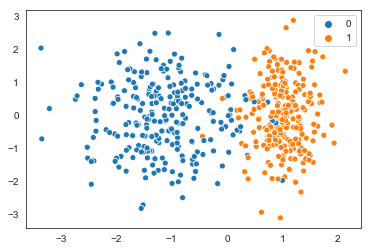

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

## Model Testing 
Finally, here is the algorithm for implementation, that we built for you using the functions you created above.

Now, let's run it to calculate the parameters of our model.

In [ ]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
theta = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, theta)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

Now we will plot the cost as a function of number of iterations.

In [ ]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


- Does the cost decrease with every iteration?<br>

- Does it converge to a minimum value?


## Model Accuracy
After running the algorithm and getting the optimal parameters, we want to know how successful our model is at predicting the classes of our data.

In [ ]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

What accuracy score did you achieve?!

## Dataset Plotting with Decision Boundary
Now, for the sake of visualization, let’s plot our dataset along with the **decision boundary** of our model.<br>


We simply calculate the intercept and slope values using the optimal parameters and plot the boundary that classifies the data into two classes.

In [ ]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

Is the classification 100% correct?

If not, how many misclassifications are present?

### Congratulations! You just successfully implemented Logistic regression from scratch!